In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs, make_moons
from sklearn.neighbors import NearestNeighbors
from math import dist
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

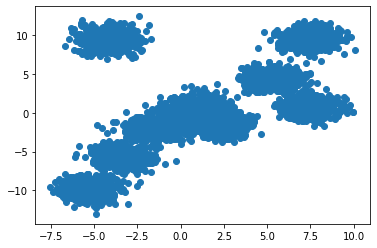

In [56]:
# X, y = make_blobs(n_samples=1000, centers=20, cluster_std=0.5, random_state=10)
X, y = make_blobs(n_samples=5000, centers=10, cluster_std=0.85, random_state=8)
# X, y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(X[:, 0], X[:, 1])

In [57]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan',
          'navy', 'red', 'blue', 'green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [58]:
min_pts = int(len(X)/200)

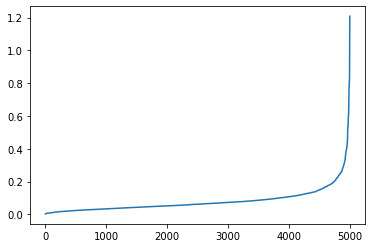

In [59]:
neigh = NearestNeighbors(n_neighbors=min_pts)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [60]:
diff = np.array([])
for key, value in enumerate(distances):
    if key != len(distances) - 1:
        diff = np.append(diff, abs(value - distances[key + 1]))

diffStd = diff.std()

for key, value in enumerate(diff):
    if value > 3 * diffStd:
        print(key)
        print(distances[key])
        eps = distances[key]
        print("***")
        break

4925
0.34221360751471275
***


In [61]:
m = DBSCAN(eps=eps, min_samples=5)
m.fit(X)

DBSCAN(eps=0.34221360751471275)

In [62]:
clusters = m.labels_
clusters

array([0, 1, 0, ..., 5, 1, 1], dtype=int64)

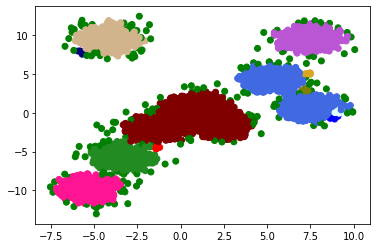

In [63]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(clusters))

In [64]:
cluster_value = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
cluster_value

,0,1,cluster
0,7.397806,0.512248,0
1,1.784901,-0.194335,1
2,6.343520,1.348038,0
3,-0.887586,-0.721447,1
4,-3.263516,-4.411936,2
...,...,...,...
4995,7.797866,1.248466,0
4996,0.647336,0.651381,1
4997,-5.502333,-9.538042,5
4998,3.434947,-0.932232,1


In [65]:
def calculate_member_core_point(cluster_values, cluster_number):
    core_point_arrays = cluster_values.groupby('cluster').get_group(cluster_number).drop('cluster', axis=1).to_numpy()
    core_points = dict()
    for pi in core_point_arrays:
        point = 0
        for pj in core_point_arrays:
            if dist(pi, pj) < eps:
                point += 1
        core_points[point] = pi
    return core_points

# dens_value = dict(sorted(calculate_member_core_point(cluster_value, 0).items(), reverse=True))
# dens_value

In [66]:
def find_center_point(point1, point2):
    n = len(point1)
    result = [0 for i in range(n)]
    for i in range(n):
        result[i] = (point1[i] + point2[i]) / 2
    return [result[i] for i, v in enumerate(result)]

In [67]:
find_center_point([5, 3, 4], [2, 7, 6])

[3.5, 5.0, 5.0]

In [68]:
def compress_data(dens_values):
    final_point = []
    not_check = []
    iterate = 0
    middlePoint = []
    for kpi, pi in dens_values.items():
        middlePoint = pi
        dens = 0
        continues = 0
        for key, check in enumerate(not_check):
            if (pi == check).all():
                continues = 1
                break
        if continues == 1:
            continue
        for kpj, pj in dens_values.items():
            if (dist(middlePoint, pj) < eps and dist(middlePoint, pj) != 0):
                middlePoint = find_center_point(middlePoint, pj)
                not_check.append(pj)
                dens += 1
        print(dens)
        middlePoint = np.append(middlePoint, dens)
        final_point.append(np.ndarray.tolist(np.array(middlePoint)))
    return final_point

In [69]:
all_data = []
for i in range(m.labels_.max() + 1):
    dens_value = dict(sorted(calculate_member_core_point(cluster_value, i).items(), reverse=True))
    all_data.append(compress_data(dens_value))

result = []
for i, vi in enumerate(all_data):
    for j, vj in enumerate(vi):
        result.append(vj)



9
9
10
2
0
10
9
9
0
0
2
5
3
1
0
0
2
0
1
1
2
0
0
0
0
0
1
0
0
0
0
0
4
6
1
0
1
5
0
1
4
1
1
1
1
2
2
0
0
0
1
1
2
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
8
8
4
9
6
1
4
1
0
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
13
14
13
14
13
1
4
8
3
3
1
0
1
0
2
0
0
0
1
0
0
0
0
0
2
6
6
6
6
6
5
6
5
3
0
3
2
1
0
0
0
0
0
0
1
0
0
0
0
4
11
7
5
3
1
2
0
2
3
3
0
0
0
3
0
0
0
0
3
0
1
1
0
0
1
3
0
2
1
2
0
1
2


In [70]:
arrays_dens = np.array(result)
arrays_dens

array([[  7.52906866,   0.28377311,   9.        ],
       [  7.52903321,   0.28454848,   9.        ],
       [  7.52925682,   0.28398935,  10.        ],
       [  4.85089491,   4.40996898,   2.        ],
       [  4.73628879,   3.94567771,   0.        ],
       [  7.52879936,   0.28386652,  10.        ],
       [  7.52868786,   0.28453953,   9.        ],
       [  7.52846773,   0.28407874,   9.        ],
       [  5.31562122,   4.24147247,   0.        ],
       [  5.8761796 ,   4.56341793,   0.        ],
       [  7.07074359,   1.09468645,   2.        ],
       [  7.06885616,   0.59878529,   5.        ],
       [  7.77061945,   1.33603497,   3.        ],
       [  5.38165844,   3.39450617,   1.        ],
       [  6.61257477,   0.85973537,   0.        ],
       [  7.85513079,  -0.1252354 ,   0.        ],
       [  7.82786894,   0.30451369,   2.        ],
       [  6.18221633,   1.07868434,   0.        ],
       [  7.58121368,  -0.46200226,   1.        ],
       [  4.39861077,   2.86436

In [71]:
new_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] >= 3)]
new_dens

array([[  7.52906866,   0.28377311,   9.        ],
       [  7.52903321,   0.28454848,   9.        ],
       [  7.52925682,   0.28398935,  10.        ],
       [  7.52879936,   0.28386652,  10.        ],
       [  7.52868786,   0.28453953,   9.        ],
       [  7.52846773,   0.28407874,   9.        ],
       [  7.06885616,   0.59878529,   5.        ],
       [  7.77061945,   1.33603497,   3.        ],
       [  0.58891729,  -0.24422986,   4.        ],
       [  0.57275579,  -0.2879425 ,   6.        ],
       [  0.57234502,  -0.13639747,   5.        ],
       [  0.59433066,  -0.13519163,   4.        ],
       [ -3.28688863,  -5.83369859,   8.        ],
       [ -3.35665661,  -6.00249435,   8.        ],
       [ -3.02420684,  -4.95696859,   4.        ],
       [ -3.28638898,  -5.83395893,   9.        ],
       [ -3.52015788,  -6.09134401,   6.        ],
       [ -4.12152146,  -5.29994271,   4.        ],
       [  8.18537076,   9.13567717,  13.        ],
       [  8.1853667 ,   9.13569

In [72]:
zero_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] < 3)]

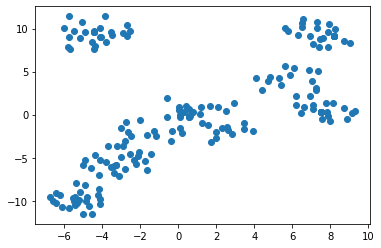

In [73]:
plt.scatter(arrays_dens[:, 0], arrays_dens[:, 1])

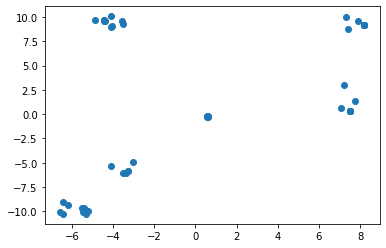

In [74]:
plt.scatter(new_dens[:, 0], new_dens[:, 1])

In [75]:
zero_dens_point = zero_dens[:, 0:len(zero_dens[0, :]) - 1]

In [76]:
delete_values = []
for key, value in enumerate(X):
    for zkey, zval in enumerate(zero_dens_point):
        if dist(zval, value) < eps:
            delete_values.append(value)

remain_values = []
for key, value in enumerate(X):
    length = 0
    for dkey, dval in enumerate(delete_values):
        if (dval != value).all():
            length += 1
    if length == len(delete_values):
        remain_values.append(value)
remain_values = np.array(remain_values)
remain_values

array([[ 7.39780583,  0.51224771],
       [ 1.78490088, -0.19433496],
       [-0.88758613, -0.7214468 ],
       ...,
       [-6.03930543, -9.3867924 ],
       [ 7.79786599,  1.24846583],
       [-5.50233324, -9.53804245]])

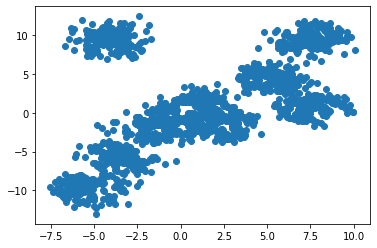

In [77]:
plt.scatter(remain_values[:, 0], remain_values[:, 1])

In [78]:
m = DBSCAN(eps=eps, min_samples=min_pts)
m.fit(remain_values)

DBSCAN(eps=0.34221360751471275, min_samples=25)

In [79]:
final_db_cluster = m.labels_
final_db_cluster

array([ 0,  1,  1, ...,  5, -1,  5], dtype=int64)

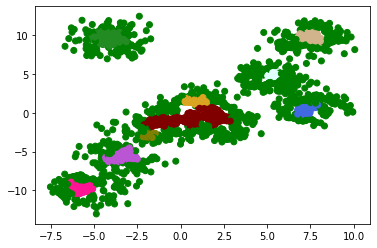

In [80]:
plt.scatter(remain_values[:, 0], remain_values[:, 1], c=vectorizer(final_db_cluster))

In [81]:
dens_cluster_value = pd.concat([pd.DataFrame(remain_values), pd.DataFrame(final_db_cluster, columns=['cluster'])],
                               axis=1)
dens_cluster_value

,0,1,cluster
0,7.397806,0.512248,0
1,1.784901,-0.194335,1
2,-0.887586,-0.721447,1
3,-3.263516,-4.411936,-1
4,-2.265656,-1.176735,-1
...,...,...,...
2933,-4.965035,9.747763,2
2934,-6.634552,-9.957819,-1
2935,-6.039305,-9.386792,5
2936,7.797866,1.248466,-1


In [82]:
def find_center_point_cluster(cluster_values, cluster_number):
    center_points = []
    for i in range(cluster_number):
        mid_point = []
        denses = cluster_values.groupby('cluster').get_group(i).drop('cluster', axis=1).to_numpy()
        for key, value in enumerate(denses):
            if key == 0:
                mid_point = value
            if (key != len(denses)):
                mid_point = find_center_point(mid_point, value)
        center_points.append(mid_point)
    return center_points

center_point =find_center_point_cluster(dens_cluster_value, max(final_db_cluster) + 1)

In [83]:
center_point = np.array(center_point)
center_point

array([[ 7.26540932,  0.50728979],
       [ 1.55309562, -0.40297253],
       [-4.61912064,  9.70135791],
       [-3.20591911, -5.60555668],
       [ 7.77279694,  9.61906371],
       [-5.66476974, -9.54447092],
       [-1.77220926, -2.95496859],
       [ 0.65709217,  1.6298924 ],
       [ 5.28469041,  4.97484744]])

In [84]:
kmeans = KMeans(n_clusters=len(center_point), init=center_point, n_init=1)
kmeans.fit(X)
k_clusters = kmeans.labels_
k_clusters

array([0, 7, 0, ..., 5, 1, 1])

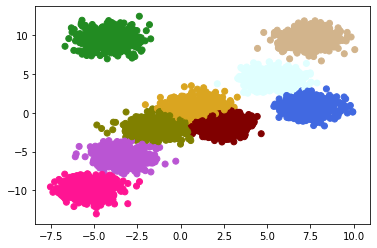

In [85]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(k_clusters))